# Supervised Learning Project: Big Mart Sales

BigMart is a big supermarket chain, with stores all around the country. The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

* **Data Dictionary**

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s).

Train file:
CSV containing the item outlet information with a sales value

Variable Description
* ItemIdentifier ---- Unique product ID
* ItemWeight ---- Weight of product
* ItemFatContent ---- Whether the product is low fat or not
* ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product
* ItemType ---- The category to which the product belongs
* ItemMRP ---- Maximum Retail Price (list price) of the product
* OutletIdentifier ---- Unique store ID
* OutletEstablishmentYear ---- The year in which the store was established
* OutletSize ---- The size of the store in terms of ground area covered
* OutletLocationType ---- The type of city in which the store is located
* OutletType ---- Whether the outlet is just a grocery store or some sort of supermarket
* ItemOutletSales ---- sales of the product in particular store. This is the outcome variable to be predicted.



Test file:
CSV containing item outlet combinations for which sales need to be forecasted

* Variable Description
* ItemIdentifier ----- Unique product ID
* ItemWeight ---- Weight of product
* ItemFatContent ----- Whether the product is low fat or not
* ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product
* ItemType ---- The category to which the product belongs
* ItemMRP ----- Maximum Retail Price (list price) of the product
* OutletIdentifier ----- Unique store ID
* OutletEstablishmentYear ----- The year in which store store was established
* OutletSize ----- The size of the store in terms of ground area covered
* OutletLocationType ---- The type of city in which the store is located
* OutletType ---- whether the outlet is just a grocery store or some sort of supermarket


This is a supervised machine learning problem with a target label as: Item_Outlet_Sales 

Since the aim is predict the sales for test dataset, this is a regression task.

Importing libraries necessary for this project.

In [1]:
# Libraries for manipulate the data.
import pandas as pd
import numpy as np

# Libraries for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for model building.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


# Exploratory Data Analysis

Exploratory data analysis is an approach to analyzing data sets and extracting useful information from the data. The analysis starts from the descriptive exploration of the data such as number of missing records and values to a visual exploration in order to better represent the data in more intuitive formats. This technique often using statistical graphics and other data visualization methods.

In [2]:
# Load dataset.
df_train = pd.read_csv('../input/big-mart-salescsv/Train_UWu5bXk.csv')
df_test = pd.read_csv('../input/big-mart-salescsv/Test_u94Q5KV.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Check the shape of the data.
print('Training data: {}'.format(df_train.shape))
print('Test data: {}'.format(df_test.shape))

Training data: (8523, 12)
Test data: (5681, 11)


In [6]:
# Check for null values on training data.
print(df_train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
# Check for null values on test data.
print(df_test.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [8]:
# Generate descriptive statistics on training data.
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Generate descriptive statistics on test data.
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**The graphs below show the univariate distribution data of the numeric variables.**

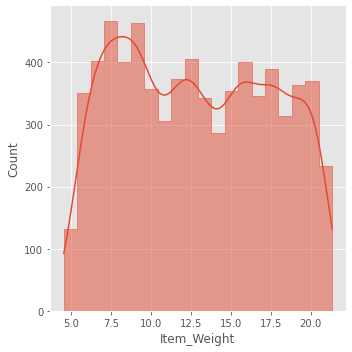

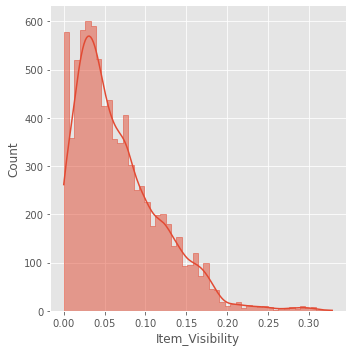

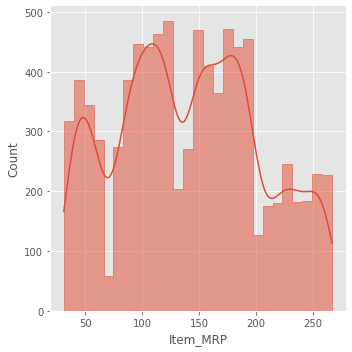

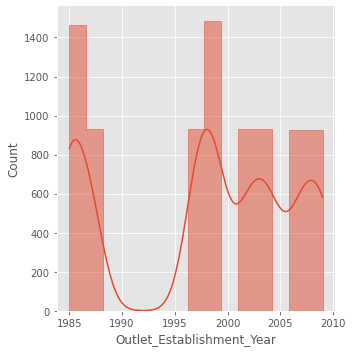

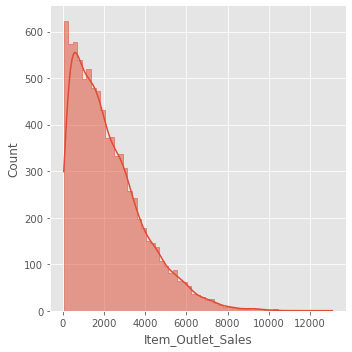

In [10]:
plt.style.use('ggplot')

for column in df_train.describe().columns:
    sns.displot(df_train[column].dropna(), kde=True, element='step')
    plt.show()

**Boxplot**

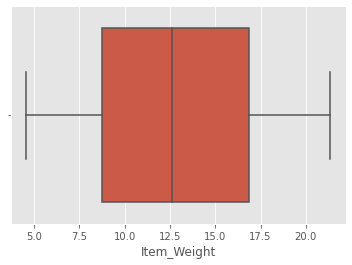

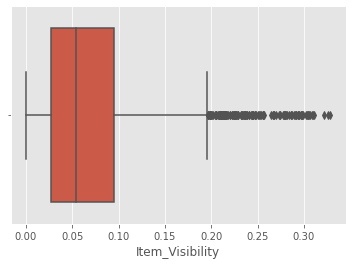

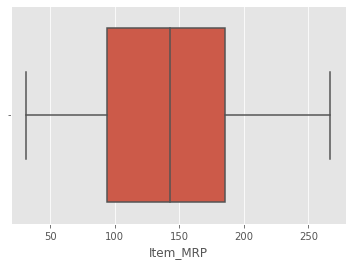

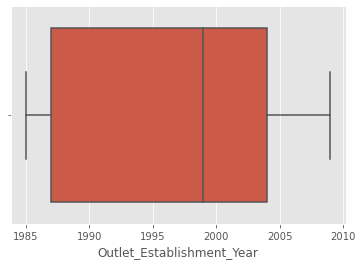

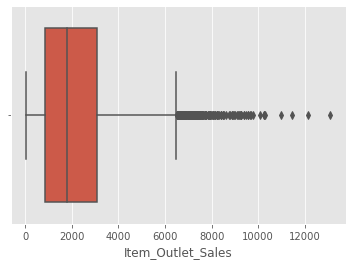

In [11]:
for column in df_train.describe().columns:
    sns.boxplot(x=df_train[column].dropna())
    plt.show()

**Relationship between variables**

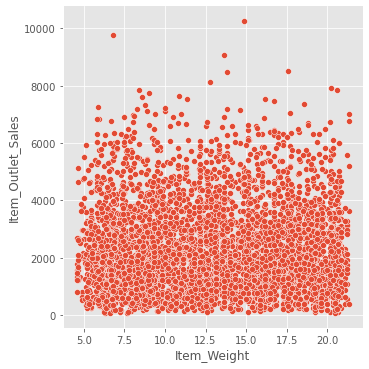

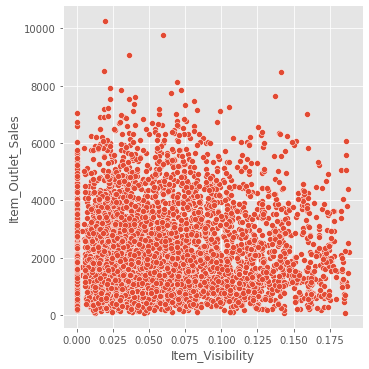

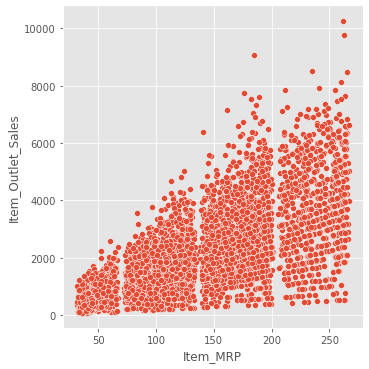

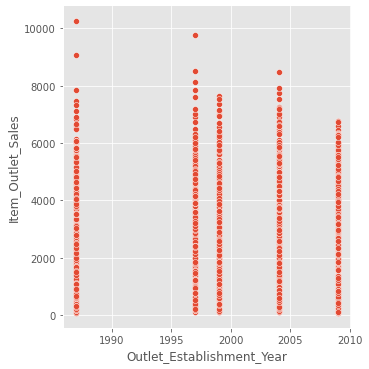

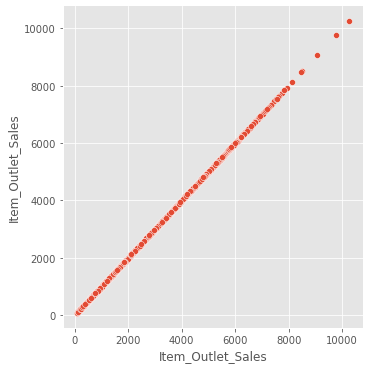

In [12]:
for column in df_train.describe().columns:
    sns.relplot(data=df_train.dropna(), x=column, y='Item_Outlet_Sales')
    plt.show()

**Analysis of the 'Item_Type' categorical variable to see the distribution of the items sold on outlets**

Among the products sold, the 'Fruits and Vegetables' are the most sold items, while 'Seafood' are the least sold.

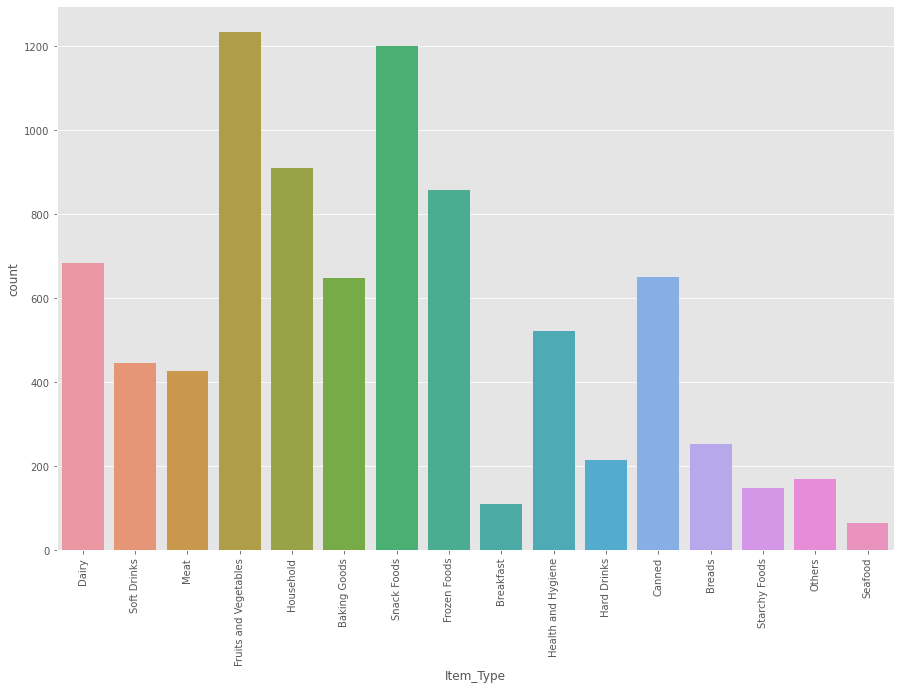

In [13]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20))

**Distribution of the 'Outlet_Size' variable**

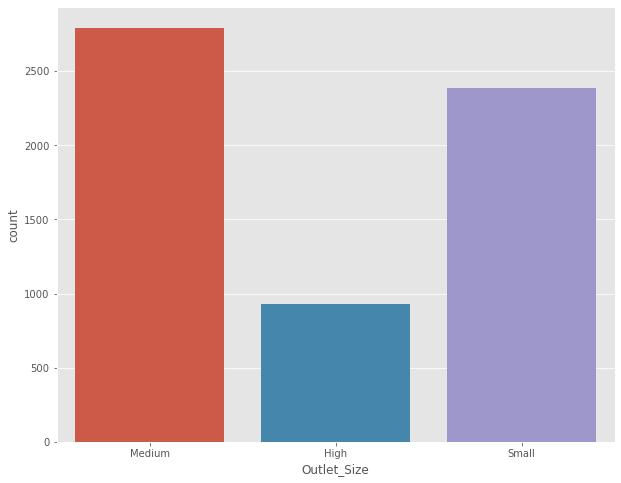

In [14]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_train['Outlet_Size'])
plt.show()

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30))

**Distribution of the 'Outlet_Location_Type' variable**

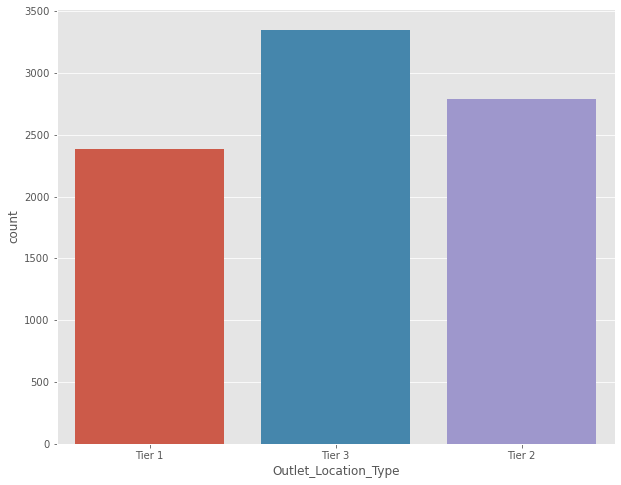

In [15]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_train['Outlet_Location_Type'])
plt.show()

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

**Distribution of the 'Outlet_Type' variable**

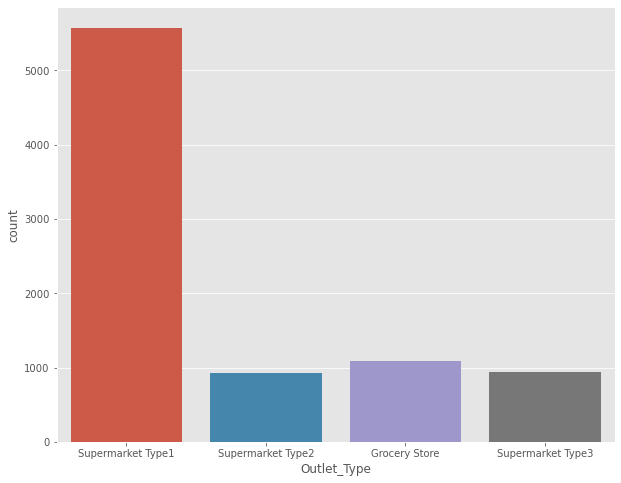

In [16]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_train['Outlet_Type'])
plt.show()

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30))

**Impact of the 'Item_Fat_Content' on 'Item_Outlet_Sales'**

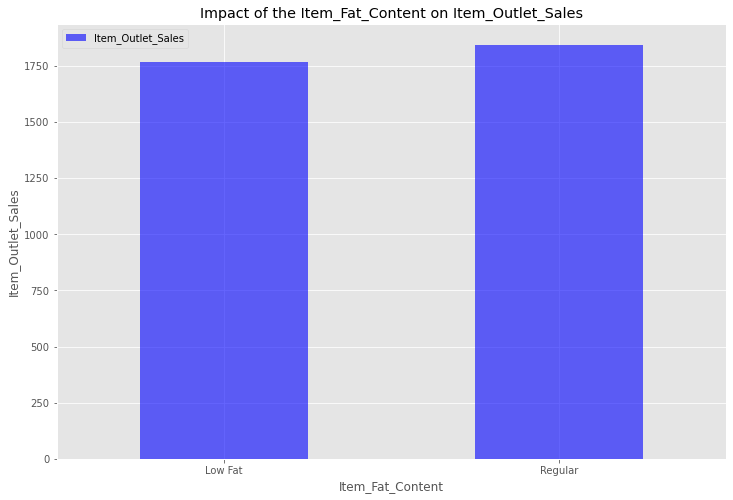

In [17]:
# Resolve naming discrepancies on 'Item_Fat_Content' variable.
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

df_item_fat_pivot = df_train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

ax = df_item_fat_pivot.plot(kind='bar', color='blue', figsize=(12,8), alpha=0.6)
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of the Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+30))

**Impact of the 'Outlet_Type' on 'Item_Outlet_Sales'**

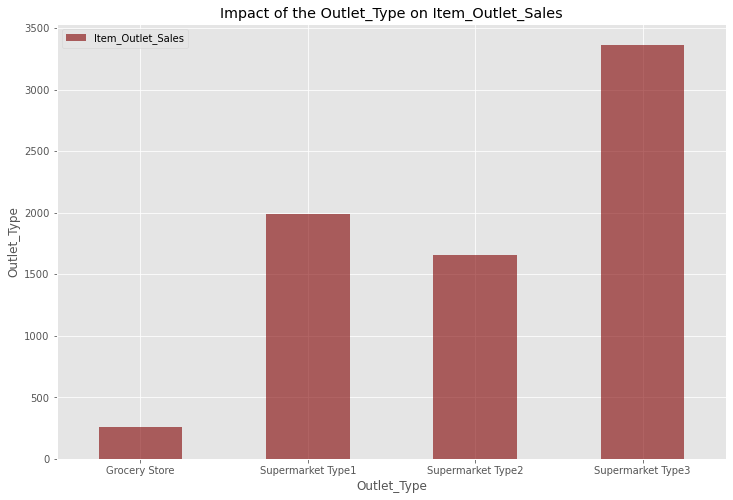

In [18]:
df_outlet_type_pivot = df_train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)

ax = df_outlet_type_pivot.plot(kind='bar', color='maroon', figsize=(12,8), alpha=0.6)
plt.ylabel('Outlet_Type')
plt.title('Impact of the Outlet_Type on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+30))

**Correlation Matrix**

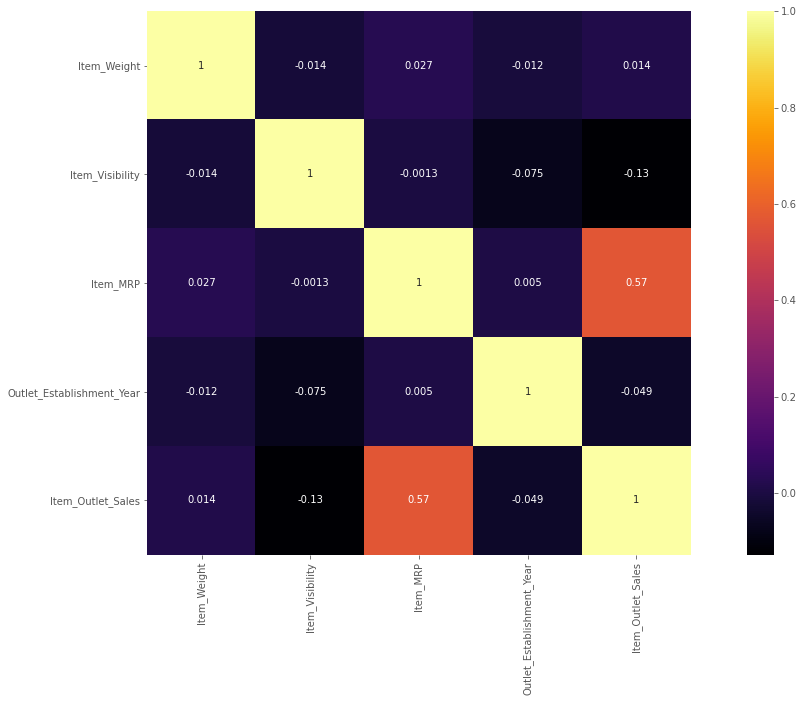

In [19]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_train.corr(), annot=True, square=True, cmap='inferno')
plt.show()

# Feature Enginnering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. This process has two main goals:

- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
- Improving the performance of machine learning models.


In [20]:
# Join training and test data to apply data mining techniques.
df_train_aux = df_train.copy()
df_test_aux = df_test.copy()
df_train_aux['Source_Data'] = 'Train'
df_test_aux['Source_Data'] = 'Test'

df_data = pd.concat([df_train_aux, df_test_aux], ignore_index=True)

In [21]:
df_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source_Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test


In [22]:
df_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source_Data                     0
dtype: int64

**Resolve naming discrepancies on 'Item_Fat_Content' variable.**

In [23]:
df_data['Item_Fat_Content'] = df_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

df_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

**Treat Missing Values (NaN)**

- Item_Weight

    Analysing the Boxplot graph of the Item_Weight variable, it's possible to assume that it has approximately an normal distribution    (Gaussian distribution). In this case, the missing values can be replaced by the median of the Item_Weight column.

In [24]:
df_data['Item_Weight'].median()

12.6

In [25]:
# Replace missing values on Item_Weight column.
df_data['Item_Weight'] = df_data['Item_Weight'].fillna(df_data['Item_Weight'].median())

In [26]:
df_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source_Data                     0
dtype: int64

- Outlet_Size
    
    The missing values of the Outlet_Size column will be replaced by the 'Medium', because it is the value most frequently on column.

In [27]:
df_data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [28]:
# Replace missing values on Outlet_Size column.
df_data['Outlet_Size'] = df_data['Outlet_Size'].fillna('Medium')

In [29]:
df_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source_Data                     0
dtype: int64

In [30]:
df_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source_Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,Test


- Item_Visibility

    The Item_Visibility column has some items with value 0 (no visibility), but all the items needs to be visible to the customers. This means that those items was not available and were marked as 0. Therefore, it's need to treat this as missing values.

In [31]:
# Amount of items marked with visility 0.
df_data[df_data['Item_Visibility'] == 0]['Item_Visibility'].count()

879

Again, the approach followed here, will be to replace those missing values with the median of the column. Since, the Boxplot graph of the Item_Visibility apresents some outliers. The median is less sensible to outliers than the mean.

In [32]:
df_data['Item_Visibility'].median()

0.054020536499999994

In [33]:
# Replace values 0 on Item_Visibility column.
df_data.loc[df_data['Item_Visibility']<=0 , 'Item_Visibility'] = df_data['Item_Visibility'].median()

In [34]:
df_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source_Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.30,Regular,0.054021,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,Test


- Outlet_Establishment_Year

In [35]:
df_data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [36]:
df_data['Outlet_Years'] = 2013 - df_data['Outlet_Establishment_Year']
df_data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

- Item_Type

In [37]:
df_data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

- Item_Identifier

Analysing the data, it's possible to note that those item types are divided in three main categories which are Food, Drink and Non-Consumable.

In [38]:
df_data['Item_Identifier'].value_counts()

FDB17    10
NCN43    10
FDE33    10
FDD51    10
FDU28    10
         ..
NCW54     7
FDM52     7
FDO33     7
NCL42     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

It's possible to note that the item names starts with either 'FD' (Food), 'DR' (Drink) or 'NC' (Non-Consumable).

In [39]:
# Get only the first two characters.
df_data['New_Item_Type'] = df_data['Item_Identifier'].apply(lambda x: x[0:2])

In [40]:
# Rename the 'New_Item_Type' to more intuitive categories.
df_data['New_Item_Type'] = df_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drink'}) 

df_data['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

Mark non-consumables as separate category in 'Item_Fat_Content'.

In [41]:
df_data.loc[df_data['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

df_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Calculate the visibility average of each product.

In [42]:
item_visibility_avg = df_data.pivot_table(values='Item_Visibility', index='Item_Identifier')

item_visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [43]:
function = lambda x: x['Item_Visibility']/item_visibility_avg['Item_Visibility'][item_visibility_avg.index == x['Item_Identifier']][0]
df_data['Item_Visibility_Avg'] = df_data.apply(function, axis=1).astype(float)

df_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source_Data,Outlet_Years,New_Item_Type,Item_Visibility_Avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,4,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,14,Food,0.733187
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train,15,Food,1.810406
4,NCD19,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,26,Non-Consumable,1.944117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test,16,Food,0.874729
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test,4,Food,0.878292
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,Test,11,Non-Consumable,0.976879
14202,FDJ26,15.30,Regular,0.054021,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,Test,6,Food,0.576022


**Transform categorical variables**

In [44]:
# Use One-hot encoding.
df_data = pd.get_dummies(df_data, prefix=['Item', 'Outlet', 'Outlet', 'Outlet', 'Outlet', 'Outlet'], columns=['Item_Fat_Content', 
                                         'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [45]:
df_data.iloc[:, :15]

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Source_Data,Outlet_Years,Item_Visibility_Avg,Item_Low Fat,Item_Non-Edible,Item_Regular,Outlet_OUT010,Outlet_OUT013
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,Train,14,0.931078,1,0,0,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,Train,4,0.933420,0,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,Train,14,0.733187,1,0,0,0,0
3,FDX07,19.20,0.054021,Fruits and Vegetables,182.0950,1998,732.3800,Train,15,1.810406,0,0,1,1,0
4,NCD19,8.93,0.054021,Household,53.8614,1987,994.7052,Train,26,1.944117,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,1997,NaN,Test,16,0.874729,0,0,1,0,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,2009,NaN,Test,4,0.878292,0,0,1,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,2002,NaN,Test,11,0.976879,0,1,0,0,0
14202,FDJ26,15.30,0.054021,Canned,214.6218,2007,NaN,Test,6,0.576022,0,0,1,0,0


In [46]:
df_data.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Source_Data',
 'Outlet_Years',
 'Item_Visibility_Avg',
 'Item_Low Fat',
 'Item_Non-Edible',
 'Item_Regular',
 'Outlet_OUT010',
 'Outlet_OUT013',
 'Outlet_OUT017',
 'Outlet_OUT018',
 'Outlet_OUT019',
 'Outlet_OUT027',
 'Outlet_OUT035',
 'Outlet_OUT045',
 'Outlet_OUT046',
 'Outlet_OUT049',
 'Outlet_High',
 'Outlet_Medium',
 'Outlet_Small',
 'Outlet_Tier 1',
 'Outlet_Tier 2',
 'Outlet_Tier 3',
 'Outlet_Grocery Store',
 'Outlet_Supermarket Type1',
 'Outlet_Supermarket Type2',
 'Outlet_Supermarket Type3',
 'Outlet_Drink',
 'Outlet_Food',
 'Outlet_Non-Consumable']

# Model Building

In [47]:
# Remove columns that doesn't will be used on model training.
df_mdl = df_data.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'])

df_mdl

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source_Data,Outlet_Years,Item_Visibility_Avg,Item_Low Fat,Item_Non-Edible,Item_Regular,...,Outlet_Tier 1,Outlet_Tier 2,Outlet_Tier 3,Outlet_Grocery Store,Outlet_Supermarket Type1,Outlet_Supermarket Type2,Outlet_Supermarket Type3,Outlet_Drink,Outlet_Food,Outlet_Non-Consumable
0,9.30,0.016047,249.8092,3735.1380,Train,14,0.931078,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,Train,4,0.933420,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,Train,14,0.733187,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.054021,182.0950,732.3800,Train,15,1.810406,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.054021,53.8614,994.7052,Train,26,1.944117,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,Test,16,0.874729,0,0,1,...,1,0,0,0,1,0,0,0,1,0
14200,7.60,0.142991,169.1448,NaN,Test,4,0.878292,0,0,1,...,0,0,1,0,0,1,0,0,1,0
14201,10.00,0.073529,118.7440,NaN,Test,11,0.976879,0,1,0,...,0,1,0,0,1,0,0,0,0,1
14202,15.30,0.054021,214.6218,NaN,Test,6,0.576022,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [48]:
# Split the data in training and test sets.
df_mdl_train = df_mdl.loc[df_mdl['Source_Data'] == 'Train']
df_mdl_test = df_mdl.loc[df_mdl['Source_Data'] == 'Test']

In [49]:
df_mdl_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source_Data,Outlet_Years,Item_Visibility_Avg,Item_Low Fat,Item_Non-Edible,Item_Regular,...,Outlet_Tier 1,Outlet_Tier 2,Outlet_Tier 3,Outlet_Grocery Store,Outlet_Supermarket Type1,Outlet_Supermarket Type2,Outlet_Supermarket Type3,Outlet_Drink,Outlet_Food,Outlet_Non-Consumable
0,9.300,0.016047,249.8092,3735.1380,Train,14,0.931078,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,443.4228,Train,4,0.933420,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,2097.2700,Train,14,0.733187,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.054021,182.0950,732.3800,Train,15,1.810406,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.054021,53.8614,994.7052,Train,26,1.944117,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,Train,26,0.874001,1,0,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,549.2850,Train,11,1.001096,0,0,1,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,1193.1136,Train,9,0.998881,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,1845.5976,Train,4,0.998626,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [50]:
df_mdl_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source_Data,Outlet_Years,Item_Visibility_Avg,Item_Low Fat,Item_Non-Edible,Item_Regular,...,Outlet_Tier 1,Outlet_Tier 2,Outlet_Tier 3,Outlet_Grocery Store,Outlet_Supermarket Type1,Outlet_Supermarket Type2,Outlet_Supermarket Type3,Outlet_Drink,Outlet_Food,Outlet_Non-Consumable
8523,20.750,0.007565,107.8622,NaN,Test,14,0.566546,1,0,0,...,1,0,0,0,1,0,0,0,1,0
8524,8.300,0.038428,87.3198,NaN,Test,6,0.960699,0,0,1,...,0,1,0,0,1,0,0,0,1,0
8525,14.600,0.099575,241.7538,NaN,Test,15,1.570903,0,1,0,...,0,0,1,1,0,0,0,0,0,1
8526,7.315,0.015388,155.0340,NaN,Test,6,0.643355,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8527,12.600,0.118599,234.2300,NaN,Test,28,0.917824,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,0.013496,141.3154,NaN,Test,16,0.874729,0,0,1,...,1,0,0,0,1,0,0,0,1,0
14200,7.600,0.142991,169.1448,NaN,Test,4,0.878292,0,0,1,...,0,0,1,0,0,1,0,0,1,0
14201,10.000,0.073529,118.7440,NaN,Test,11,0.976879,0,1,0,...,0,1,0,0,1,0,0,0,0,1
14202,15.300,0.054021,214.6218,NaN,Test,6,0.576022,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [51]:
# Remove columns that doesn't will be used.
df_mdl_train = df_mdl_train.drop(columns=['Source_Data'])
df_mdl_test = df_mdl_test.drop(columns=['Item_Outlet_Sales', 'Source_Data'])


In [52]:
df_mdl_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Low Fat,Item_Non-Edible,Item_Regular,Outlet_OUT010,Outlet_OUT013,...,Outlet_Tier 1,Outlet_Tier 2,Outlet_Tier 3,Outlet_Grocery Store,Outlet_Supermarket Type1,Outlet_Supermarket Type2,Outlet_Supermarket Type3,Outlet_Drink,Outlet_Food,Outlet_Non-Consumable
8523,20.750,0.007565,107.8622,14,0.566546,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
8524,8.300,0.038428,87.3198,6,0.960699,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8525,14.600,0.099575,241.7538,15,1.570903,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
8526,7.315,0.015388,155.0340,6,0.643355,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8527,12.600,0.118599,234.2300,28,0.917824,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,0.013496,141.3154,16,0.874729,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
14200,7.600,0.142991,169.1448,4,0.878292,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
14201,10.000,0.073529,118.7440,11,0.976879,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
14202,15.300,0.054021,214.6218,6,0.576022,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [53]:
x_train = df_mdl_train.drop(columns=['Item_Outlet_Sales']).to_numpy()
y_train = df_mdl_train['Item_Outlet_Sales'].to_numpy()

x_test = df_mdl_test.to_numpy()

In [54]:
# Standardize features.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

NameError: name 'x_val' is not defined

# Random Forest

Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or average prediction (regression) of the individual trees.

In [ ]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)
y_pred

In [ ]:
df_result = pd.DataFrame(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
df_result['Item_Identifier'] = df_test['Item_Identifier']
df_result['Outlet_Identifier'] = df_test['Outlet_Identifier']
df_result['Item_Outlet_Sales'] = y_pred

df_result.to_csv('result.csv', index=False)

In [ ]:
df_result

In [ ]:
reg.score(x_train, y_train)

# Considerations

The Random forest algorithm obtained a good score (coefficient of determination r2) of 0.9 at training data.

But, there are others methods that can be used in this dataset. Examples:

- Support Vector Regressor (SVR)
- Bagging Regression
- Gradient Boosting 
- Artificial Neural Networks (ANN)
- Among others.